In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
from math import sin,cos
import io
import cv2
import pykalman
from scipy import optimize

# Лабораторная работа 1.6
В файле «Transmitter.txt» записана матрица, каждая строка которой представляет собой сигнал, подаваемый на соответствующий громкоговоритель. В файле «Receiver.txt» записан сигнал 𝑟, поступаемый с микрофона.Рассмотрена взаимную корреляционную функция между 𝑟(𝑡) и 𝑠(𝑡). Далее по имеющимся данным оценить параметр T,решение находится методом наименьших квадратов.

In [18]:
#координаты loudspeaker-ов
coord = [[0,0,10],[20,0,10],[20,20,10],[0,20,10]]
#частота дискретизации
samp_rate = 100000
#скорость звука
c_speed = 1125

In [8]:
f = open('/data files/Receiver.txt')
r = []
for line in f:
    q = line.split()
    q = [float(a) for a in q]
    r.append(q)
   # print(q)
r = r[0]

3500


In [11]:
f = open('/data files/Transmitter.txt')
s = []
for line in f:
    q = line.split()
    q = [float(a) for a in q]
    s.append(q)

500


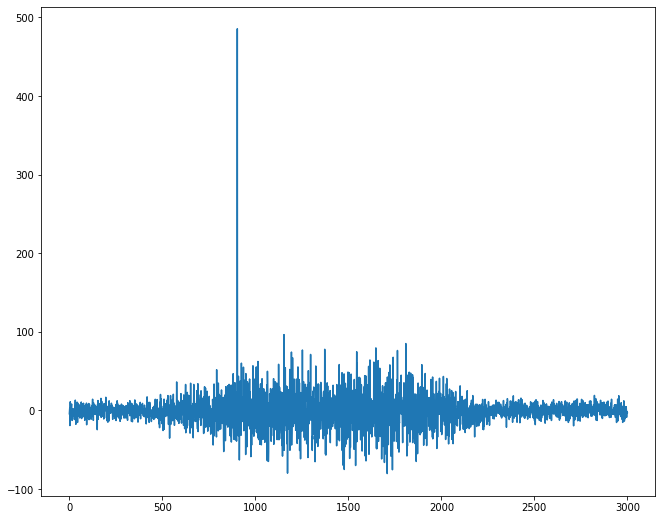

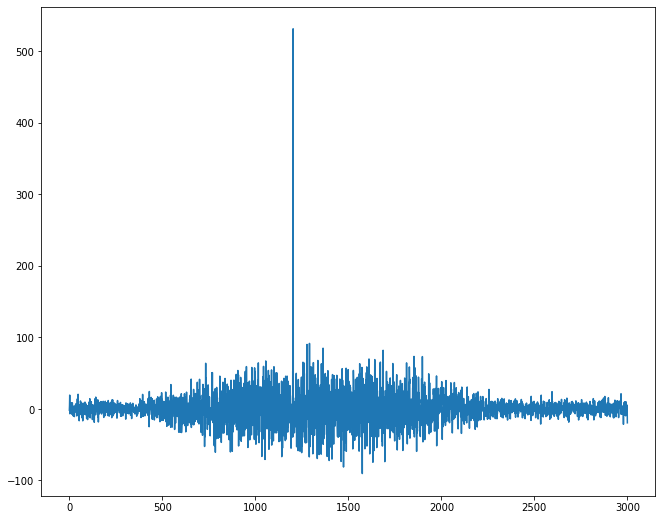

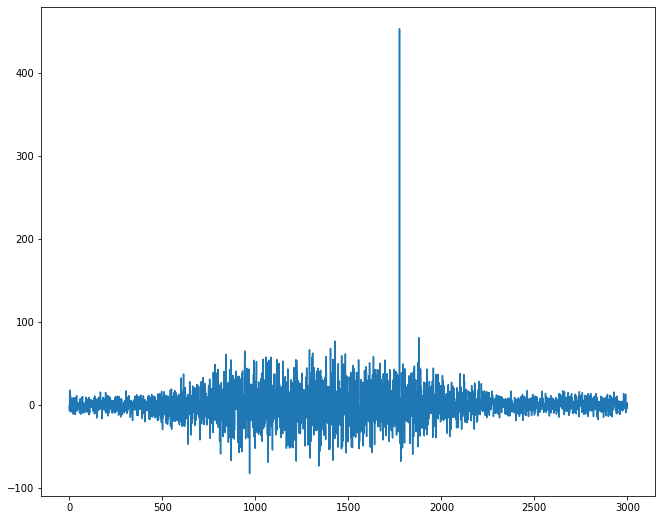

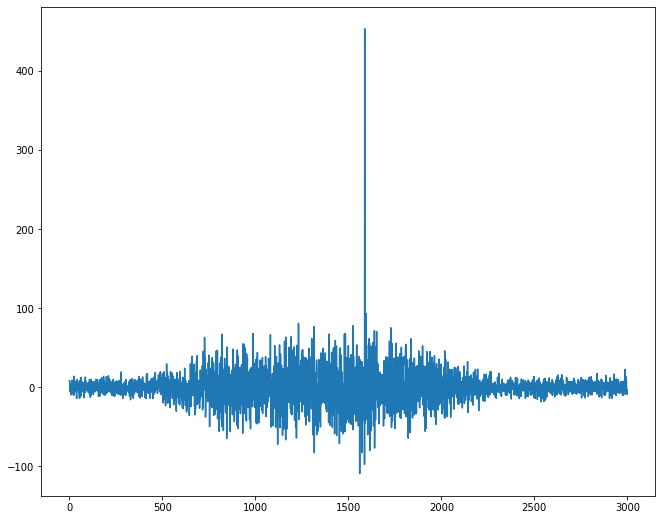

In [15]:
k = []
for signal in s:
    plt.figure(figsize=(11, 9))
    res = np.correlate(r, signal)
    maxind =  0 
    maxx = -1000
    for i in range(0,len(res)):
        if res[i] > maxx:
            maxx = res[i]
            maxind = i
    k.append(maxind)
    plt.plot(res)    

In [16]:
print(k)

[903, 1203, 1775, 1588]


In [24]:
# расстояния до объектов
ss = [ (1/samp_rate * x) * c_speed for x in k ]

def F(point):
    x,y,z = point
    ans = 0 
    for i in range(4):
        ans += (ss[i] - math.sqrt( (coord[i][0] - x)**2 + (coord[i][1] - y)**2 + (coord[i][2] - z)**2 ))**2
    return ans 
# применяем встроенный метод наименьших квадратов для решения системы уравнений
res = optimize.least_squares(F,x0=[0,0,0])
print(res.x)

[8.00353434 4.60490262 5.76045975]
